In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score,train_test_split,RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.model_selection import GridSearchCV, ParameterGrid
import time as time

import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
def mase(actual, forecast):
    n = len(actual)
    numerator = np.mean(np.abs(actual - forecast))
    denominator = np.mean(np.abs(np.diff(actual)))
    return numerator / denominator

In [3]:
covid_df = pd.read_csv('nc_multi_df.csv', parse_dates=['Date'])
covid_df.drop(columns = ['PROVINCE_STATE_NAME'], inplace = True)
covid_df = covid_df.rename(columns={'Date': 'ds', 'PEOPLE_POSITIVE_NEW_CASES_COUNT': 'y'})
covid_df.set_index('ds', inplace=True)

train_size = int(len(covid_df)* 0.85)
covid_train, covid_test = covid_df[0:train_size], covid_df[train_size:]

In [4]:
covid_train =covid_train[['y', 'new_hospitalized_patients', 'new_deaths_1_lag', 'new_cases_350_lag', 'new_cases_150_lag', 'new_cases_10_mean', 'PEOPLE_DEATH_NEW_COUNT', 'new_cases_2_lag', 'new_cases_7_lag', 'current_intensive_care_patients', 'minimum_temperature_celsius', 'new_cases_1 lag', 'new_cases_10_max', 'new_cases_30_lag', 'new_cases_3_lag', 'maximum_temperature_celsius', 'new_deaths_7_lag', 'new_cases_10_std', 'new_cases_50_lag', 'new_deaths_50_mean']]
covid_test =covid_test[['y', 'new_hospitalized_patients', 'new_deaths_1_lag', 'new_cases_350_lag', 'new_cases_150_lag', 'new_cases_10_mean', 'PEOPLE_DEATH_NEW_COUNT', 'new_cases_2_lag', 'new_cases_7_lag', 'current_intensive_care_patients', 'minimum_temperature_celsius', 'new_cases_1 lag', 'new_cases_10_max', 'new_cases_30_lag', 'new_cases_3_lag', 'maximum_temperature_celsius', 'new_deaths_7_lag', 'new_cases_10_std', 'new_cases_50_lag', 'new_deaths_50_mean']]

In [5]:
X_train = covid_train.drop(columns=['y'], axis=1)
y_train = covid_train['y']
X_test = covid_test.drop(columns=['y'], axis=1)
y_test = covid_test['y']

In [6]:
reg_model = xgb.XGBRegressor(learning_rate=0.01,n_estimators=10000, early_stopping_rounds=10)
reg_model.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)], 
       verbose=True)

[0]	validation_0-rmse:4116.46103	validation_1-rmse:19016.54748
[1]	validation_0-rmse:4080.99345	validation_1-rmse:18986.16215
[2]	validation_0-rmse:4045.87914	validation_1-rmse:18956.42424
[3]	validation_0-rmse:4011.11497	validation_1-rmse:18927.17227
[4]	validation_0-rmse:3976.69670	validation_1-rmse:18898.26264
[5]	validation_0-rmse:3942.62194	validation_1-rmse:18869.47405
[6]	validation_0-rmse:3908.88268	validation_1-rmse:18841.20787
[7]	validation_0-rmse:3875.48393	validation_1-rmse:18813.28783
[8]	validation_0-rmse:3842.41691	validation_1-rmse:18785.73136
[9]	validation_0-rmse:3809.67584	validation_1-rmse:18758.59117
[10]	validation_0-rmse:3777.27199	validation_1-rmse:18731.18293
[11]	validation_0-rmse:3745.18787	validation_1-rmse:18704.13980
[12]	validation_0-rmse:3713.42455	validation_1-rmse:18677.50236
[13]	validation_0-rmse:3681.96226	validation_1-rmse:18649.93509
[14]	validation_0-rmse:3650.82546	validation_1-rmse:18624.01708
[15]	validation_0-rmse:3619.98880	validation_1-rms

[128]	validation_0-rmse:1474.25135	validation_1-rmse:16286.64630
[129]	validation_0-rmse:1463.72573	validation_1-rmse:16266.15930
[130]	validation_0-rmse:1453.30744	validation_1-rmse:16245.86471
[131]	validation_0-rmse:1442.99521	validation_1-rmse:16225.78853
[132]	validation_0-rmse:1432.31143	validation_1-rmse:16219.60953
[133]	validation_0-rmse:1422.13825	validation_1-rmse:16199.38580
[134]	validation_0-rmse:1412.12318	validation_1-rmse:16179.87456
[135]	validation_0-rmse:1401.75616	validation_1-rmse:16159.73523
[136]	validation_0-rmse:1391.93045	validation_1-rmse:16140.59373
[137]	validation_0-rmse:1382.15055	validation_1-rmse:16121.12572
[138]	validation_0-rmse:1372.03199	validation_1-rmse:16115.27336
[139]	validation_0-rmse:1362.43227	validation_1-rmse:16096.18170
[140]	validation_0-rmse:1352.98797	validation_1-rmse:16077.76828
[141]	validation_0-rmse:1343.16779	validation_1-rmse:16058.89900
[142]	validation_0-rmse:1333.84207	validation_1-rmse:16040.35527
[143]	validation_0-rmse:1

[256]	validation_0-rmse:651.39749	validation_1-rmse:15421.99964
[257]	validation_0-rmse:648.09976	validation_1-rmse:15419.02830
[258]	validation_0-rmse:644.79353	validation_1-rmse:15416.12623
[259]	validation_0-rmse:641.49516	validation_1-rmse:15413.25550
[260]	validation_0-rmse:638.24827	validation_1-rmse:15410.40953
[261]	validation_0-rmse:635.02162	validation_1-rmse:15407.59496
[262]	validation_0-rmse:631.83905	validation_1-rmse:15404.80581
[263]	validation_0-rmse:628.69060	validation_1-rmse:15402.04417
[264]	validation_0-rmse:625.58792	validation_1-rmse:15399.26776
[265]	validation_0-rmse:622.47766	validation_1-rmse:15396.57000
[266]	validation_0-rmse:619.40429	validation_1-rmse:15393.88902
[267]	validation_0-rmse:616.35604	validation_1-rmse:15391.24378
[268]	validation_0-rmse:613.34018	validation_1-rmse:15388.61407
[269]	validation_0-rmse:610.35521	validation_1-rmse:15386.00860
[270]	validation_0-rmse:607.37202	validation_1-rmse:15383.38956
[271]	validation_0-rmse:604.44434	valida

[385]	validation_0-rmse:363.56966	validation_1-rmse:15212.51322
[386]	validation_0-rmse:362.24701	validation_1-rmse:15211.54164
[387]	validation_0-rmse:360.96073	validation_1-rmse:15210.56509
[388]	validation_0-rmse:359.78177	validation_1-rmse:15209.60993
[389]	validation_0-rmse:358.47342	validation_1-rmse:15208.65253
[390]	validation_0-rmse:357.24012	validation_1-rmse:15207.70219
[391]	validation_0-rmse:356.05234	validation_1-rmse:15206.76538
[392]	validation_0-rmse:354.78036	validation_1-rmse:15205.82932
[393]	validation_0-rmse:353.52225	validation_1-rmse:15204.90026
[394]	validation_0-rmse:352.36742	validation_1-rmse:15203.98434
[395]	validation_0-rmse:351.15537	validation_1-rmse:15203.07152
[396]	validation_0-rmse:350.04396	validation_1-rmse:15202.16411
[397]	validation_0-rmse:348.77273	validation_1-rmse:15201.25597
[398]	validation_0-rmse:347.51504	validation_1-rmse:15200.35433
[399]	validation_0-rmse:346.27067	validation_1-rmse:15199.45975
[400]	validation_0-rmse:345.00485	valida

[514]	validation_0-rmse:251.19340	validation_1-rmse:15129.85406
[515]	validation_0-rmse:250.45822	validation_1-rmse:15129.44908
[516]	validation_0-rmse:250.02091	validation_1-rmse:15129.08216
[517]	validation_0-rmse:249.31929	validation_1-rmse:15128.69028
[518]	validation_0-rmse:248.88938	validation_1-rmse:15128.32821
[519]	validation_0-rmse:248.37110	validation_1-rmse:15127.92624
[520]	validation_0-rmse:247.85039	validation_1-rmse:15127.53985
[521]	validation_0-rmse:247.43077	validation_1-rmse:15127.18075
[522]	validation_0-rmse:246.72661	validation_1-rmse:15126.80530
[523]	validation_0-rmse:246.22305	validation_1-rmse:15126.41413
[524]	validation_0-rmse:245.81327	validation_1-rmse:15126.06233
[525]	validation_0-rmse:245.30907	validation_1-rmse:15125.69047
[526]	validation_0-rmse:244.62098	validation_1-rmse:15125.32480
[527]	validation_0-rmse:243.96119	validation_1-rmse:15124.96006
[528]	validation_0-rmse:243.56315	validation_1-rmse:15124.61815
[529]	validation_0-rmse:243.07896	valida

[643]	validation_0-rmse:202.31576	validation_1-rmse:15094.41163
[644]	validation_0-rmse:202.16374	validation_1-rmse:15094.23957
[645]	validation_0-rmse:201.85246	validation_1-rmse:15094.05302
[646]	validation_0-rmse:201.63099	validation_1-rmse:15093.89851
[647]	validation_0-rmse:201.48218	validation_1-rmse:15093.72784
[648]	validation_0-rmse:201.18082	validation_1-rmse:15093.55341
[649]	validation_0-rmse:201.02840	validation_1-rmse:15093.41697
[650]	validation_0-rmse:200.82741	validation_1-rmse:15093.23910
[651]	validation_0-rmse:200.54498	validation_1-rmse:15093.07273
[652]	validation_0-rmse:200.40174	validation_1-rmse:15092.91141
[653]	validation_0-rmse:200.14790	validation_1-rmse:15092.74456
[654]	validation_0-rmse:200.00559	validation_1-rmse:15092.58556
[655]	validation_0-rmse:199.75589	validation_1-rmse:15092.42138
[656]	validation_0-rmse:199.44105	validation_1-rmse:15092.34420
[657]	validation_0-rmse:199.30647	validation_1-rmse:15092.22064
[658]	validation_0-rmse:199.11262	valida

[772]	validation_0-rmse:177.96613	validation_1-rmse:15082.74435
[773]	validation_0-rmse:177.86182	validation_1-rmse:15082.68291
[774]	validation_0-rmse:177.67242	validation_1-rmse:15082.65040
[775]	validation_0-rmse:177.50117	validation_1-rmse:15082.56508
[776]	validation_0-rmse:177.33812	validation_1-rmse:15082.53362
[777]	validation_0-rmse:177.19330	validation_1-rmse:15082.44528
[778]	validation_0-rmse:177.03320	validation_1-rmse:15082.39016
[779]	validation_0-rmse:176.93228	validation_1-rmse:15082.35698
[780]	validation_0-rmse:176.73537	validation_1-rmse:15082.27207
[781]	validation_0-rmse:176.57813	validation_1-rmse:15082.21649
[782]	validation_0-rmse:176.47794	validation_1-rmse:15082.18413
[783]	validation_0-rmse:176.37076	validation_1-rmse:15082.09845
[784]	validation_0-rmse:176.19584	validation_1-rmse:15082.06569
[785]	validation_0-rmse:176.09023	validation_1-rmse:15081.98081
[786]	validation_0-rmse:175.99314	validation_1-rmse:15081.92380
[787]	validation_0-rmse:175.80298	valida

[901]	validation_0-rmse:160.18355	validation_1-rmse:15077.51924
[902]	validation_0-rmse:159.97924	validation_1-rmse:15077.43163
[903]	validation_0-rmse:159.80768	validation_1-rmse:15077.33688
[904]	validation_0-rmse:159.70632	validation_1-rmse:15077.25271
[905]	validation_0-rmse:159.57859	validation_1-rmse:15077.16054
[906]	validation_0-rmse:159.46670	validation_1-rmse:15077.07425
[907]	validation_0-rmse:159.36971	validation_1-rmse:15076.98573
[908]	validation_0-rmse:159.30695	validation_1-rmse:15076.90027
[909]	validation_0-rmse:159.19709	validation_1-rmse:15076.81584
[910]	validation_0-rmse:158.99949	validation_1-rmse:15076.72500
[911]	validation_0-rmse:158.87468	validation_1-rmse:15076.63681
[912]	validation_0-rmse:158.72979	validation_1-rmse:15076.55344
[913]	validation_0-rmse:158.60704	validation_1-rmse:15076.47186
[914]	validation_0-rmse:158.49936	validation_1-rmse:15076.39013
[915]	validation_0-rmse:158.19545	validation_1-rmse:15076.19998
[916]	validation_0-rmse:158.08950	valida

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=10,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=10000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

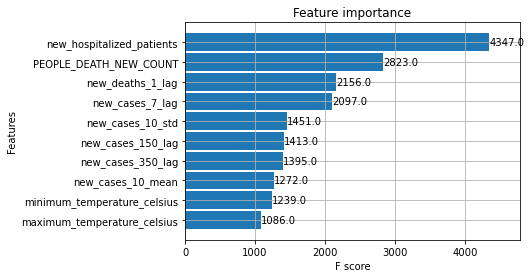

In [7]:
_ = plot_importance(reg_model, height=0.9 ,max_num_features = 10)

<AxesSubplot:xlabel='ds'>

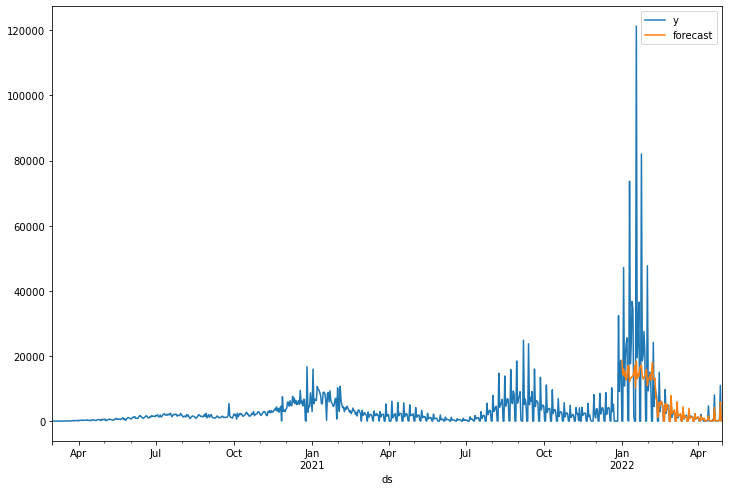

In [8]:
covid_test['forecast'] = reg_model.predict(X_test)

prophet_df_multi = pd.DataFrame(covid_df)

prophet_df_multi['forecast']=covid_test['forecast']

prophet_df_multi[['y', 'forecast']].plot(figsize=(12,8))

<AxesSubplot:xlabel='ds'>

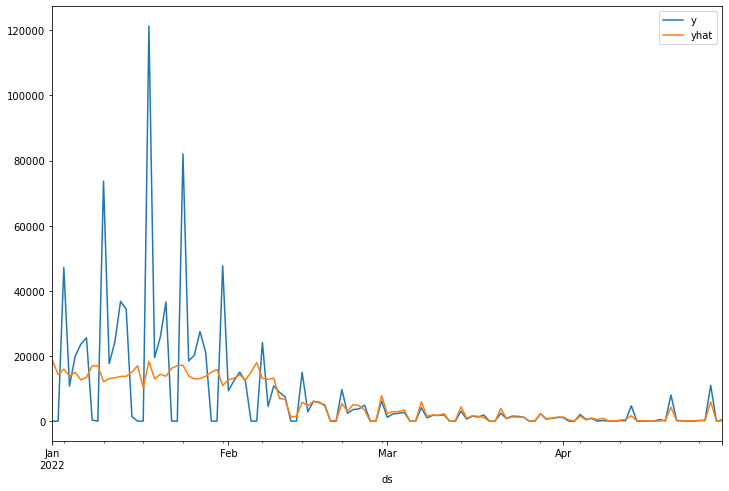

In [9]:
graph_df = pd.DataFrame(covid_test)
graph_df['yhat'] = covid_test['forecast'].values
graph_df[['y','yhat']].plot(figsize=(12,8))

In [10]:
model_rmse = mean_squared_error(covid_test['y'], covid_test['forecast'], squared=False)
model_mae = mean_absolute_error(covid_test['y'], covid_test['forecast'])
print('Test RMSE: ', model_rmse)
print('Test MAE: ', model_mae)
print('MASE = ', mase(covid_test['y'], covid_test['forecast']))

Test RMSE:  15073.049357317852
Test MAE:  6304.910960566096
MASE =  0.6775775691478766


In [11]:
from sklearn.model_selection import TimeSeriesSplit

tss = TimeSeriesSplit(n_splits = 5, test_size = 100, gap = 1)
covid_df = covid_df.sort_index()

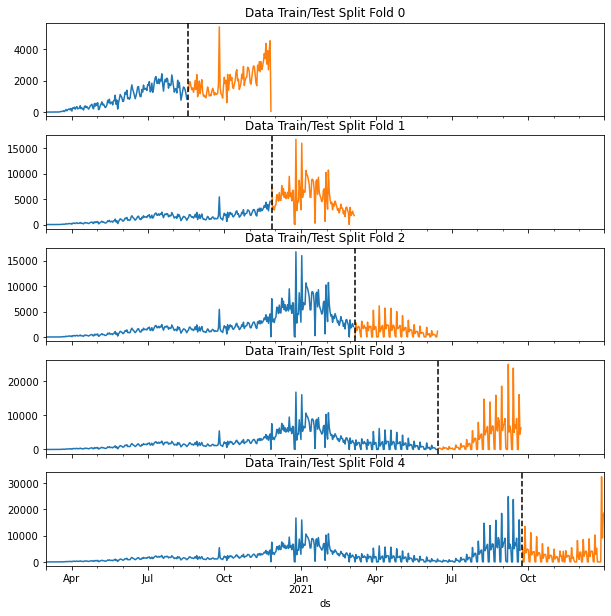

In [12]:
fig, axs = plt.subplots(5, 1, figsize=(10, 10), sharex=True)

fold = 0
for train_idx, val_idx in tss.split(covid_train):
    train = covid_df.iloc[train_idx]
    test = covid_df.iloc[val_idx]
    train['y'].plot(ax=axs[fold],
                          label='Training Set',
                          title=f'Data Train/Test Split Fold {fold}')
    test['y'].plot(ax=axs[fold],
                         label='Test Set')
    axs[fold].axvline(test.index.min(), color='black', ls='--')
    fold += 1
plt.show()

In [13]:
tss = TimeSeriesSplit(n_splits=5, test_size=100, gap=1)
covid_df = covid_df.sort_index()


fold = 0
preds = []
scores = []
for train_idx, val_idx in tss.split(covid_train):
    train = covid_df.iloc[train_idx]
    test = covid_df.iloc[val_idx]
    TARGET = 'y'

    reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                           n_estimators=1000,
                           early_stopping_rounds=20,
                           objective='reg:linear',
                           max_depth=3,
                           learning_rate=0.01)
    reg.fit(X_train, y_train,
            eval_set=[(X_train, y_train), (X_test, y_test)],
            verbose=100)

    y_pred = reg.predict(X_test)
    preds.append(y_pred)
    score = np.sqrt(mean_squared_error(y_test, y_pred))
    scores.append(score)  

[19:49:25] WARNING: c:\users\dev-admin\croot2\xgboost-split_1675461376218\work\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4118.96422	validation_1-rmse:19004.45401
[100]	validation_0-rmse:1996.55749	validation_1-rmse:16546.54103
[200]	validation_0-rmse:1202.30812	validation_1-rmse:15600.68057
[300]	validation_0-rmse:897.96890	validation_1-rmse:15019.89961
[400]	validation_0-rmse:761.56914	validation_1-rmse:14785.95290
[500]	validation_0-rmse:675.66691	validation_1-rmse:14614.85044
[600]	validation_0-rmse:614.46946	validation_1-rmse:14513.88428
[700]	validation_0-rmse:564.00114	validation_1-rmse:14429.58768
[800]	validation_0-rmse:519.24361	validation_1-rmse:14393.67310
[900]	validation_0-rmse:484.89881	validation_1-rmse:14370.71530
[999]	validation_0-rmse:457.26211	validation_1-rmse:14355.90967
[19:49:26] WARNING: c:\users\dev-admin\croot2\xgboost-split_1675461376218\work\src\objective\regression_obj.cu:213: reg:

<AxesSubplot:xlabel='ds'>

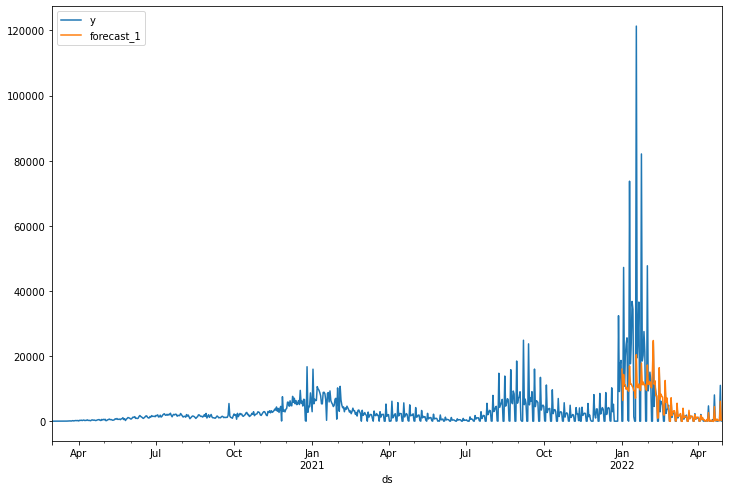

In [14]:
covid_test['forecast_1'] = reg.predict(X_test)

prophet_df_multi = pd.DataFrame(covid_df)

prophet_df_multi['forecast_1']=covid_test['forecast_1']

prophet_df_multi[['y', 'forecast_1']].plot(figsize=(12,8))

<AxesSubplot:xlabel='ds'>

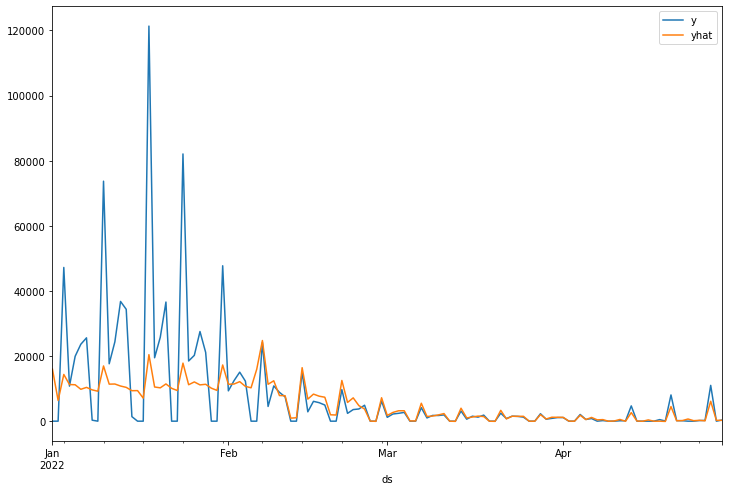

In [15]:
graph_df = pd.DataFrame(covid_test)
graph_df['yhat'] = covid_test['forecast_1'].values
graph_df[['y','yhat']].plot(figsize=(12,8))

In [16]:
model_rmse = mean_squared_error(covid_test['y'], covid_test['forecast'], squared=False)
model_mae = mean_absolute_error(covid_test['y'], covid_test['forecast'])
print('Test RMSE: ', model_rmse)
print('Test MAE: ', model_mae)
print('MASE = ', mase(covid_test['y'], covid_test['forecast']))

Test RMSE:  15073.049357317852
Test MAE:  6304.910960566096
MASE =  0.6775775691478766
